# __Global Earthquake Visualizations__
#### Project by Nikolas White

### __Data Collection__

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Load the dataset
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
earthquakes = pd.read_csv(url)
print(earthquakes.head())

                       time   latitude   longitude  depth   mag magType   nst  \
0  2024-06-23T14:02:34.310Z  33.357000 -116.285667  10.84  0.67      ml  44.0   
1  2024-06-23T13:52:18.879Z  66.239600 -157.447700   0.00  2.00      ml   NaN   
2  2024-06-23T13:49:32.893Z  62.297000 -150.250300   0.80  1.90      ml   NaN   
3  2024-06-23T13:43:50.010Z  37.267166 -121.648834   0.48  1.36      md   9.0   
4  2024-06-23T13:41:51.106Z  37.350700 -117.207800   2.80  1.50      ml  24.0   

      gap     dmin     rms  ...                   updated  \
0   56.00  0.02073  0.1900  ...  2024-06-23T14:16:03.863Z   
1     NaN      NaN  0.5500  ...  2024-06-23T13:55:19.024Z   
2     NaN      NaN  0.4400  ...  2024-06-23T13:51:33.252Z   
3  116.00  0.02103  0.0100  ...  2024-06-23T13:45:30.813Z   
4  127.74  0.06600  0.1664  ...  2024-06-23T13:44:21.826Z   

                               place        type horizontalError depthError  \
0    14 km NE of Borrego Springs, CA  earthquake            0.21   

### __Exploratory Data Analysis__

In [2]:
# Display basic information about the dataset
print(earthquakes.info())

# Check for missing values
print(earthquakes.isnull().sum())

# Handling missing or invalid data
earthquakes = earthquakes[['latitude', 'longitude', 'mag']].dropna()
earthquakes['mag'] = earthquakes['mag'].clip(lower=0)  # Remove negative magnitudes if any

print(earthquakes.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10005 entries, 0 to 10004
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10005 non-null  object 
 1   latitude         10005 non-null  float64
 2   longitude        10005 non-null  float64
 3   depth            10005 non-null  float64
 4   mag              10005 non-null  float64
 5   magType          10005 non-null  object 
 6   nst              8532 non-null   float64
 7   gap              8532 non-null   float64
 8   dmin             8520 non-null   float64
 9   rms              10005 non-null  float64
 10  net              10005 non-null  object 
 11  id               10005 non-null  object 
 12  updated          10005 non-null  object 
 13  place            10005 non-null  object 
 14  type             10005 non-null  object 
 15  horizontalError  7846 non-null   float64
 16  depthError       10005 non-null  float64
 17  magError    

### __Geographical Visualization (Static Map)__

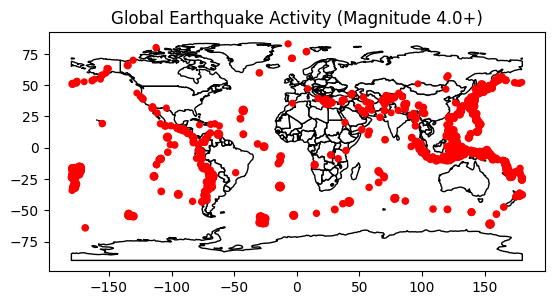

In [7]:
# Load world map directly from Natural Earth
world_url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(world_url)

# Filter the DataFrame to include only earthquakes with magnitude 4.0 or higher
filtered_earthquakes = earthquakes[earthquakes['mag'] >= 4]

# Convert filtered DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(
    filtered_earthquakes, 
    geometry=gpd.points_from_xy(filtered_earthquakes.longitude, filtered_earthquakes.latitude)
)

# Plotting
ax = world.plot(color='white', edgecolor='black')  # Base map with countries
gdf.plot(ax=ax, color='red', markersize=filtered_earthquakes['mag']**2)  # Scale marker size by magnitude squared
plt.title('Global Earthquake Activity (Magnitude 4.0+)')
plt.show()


### __Geographical Visualization (Interactive Map)__

In [8]:
# Create a base map
map = folium.Map(location=[0, 0], zoom_start=2)

# Iterate over the DataFrame to create a marker for each earthquake
for index, row in earthquakes.iterrows():
    # Only add markers for earthquakes with magnitude 4.0 or higher
    if row['mag'] >= 4:
        # Define color based on magnitude
        color = 'red' if row['mag'] >= 5 else 'orange'

        # Create a popup message that includes magnitude information
        popup_message = folium.Popup(
            '<strong>Magnitude:</strong> {:.2f}'.format(row['mag']),
            max_width=300)

        # Create a circle marker with the popup
        folium.Circle(
            location=[row['latitude'], row['longitude']],
            radius=row['mag'] * 10000,  # Size of the marker scaled by magnitude
            color=color,
            fill=True,
            fill_color=color,
            popup=popup_message
        ).add_to(map)

# Save the map to an HTML file
map.save('earthquake_map_filtered.html')


# Display the map directly in the notebook
map

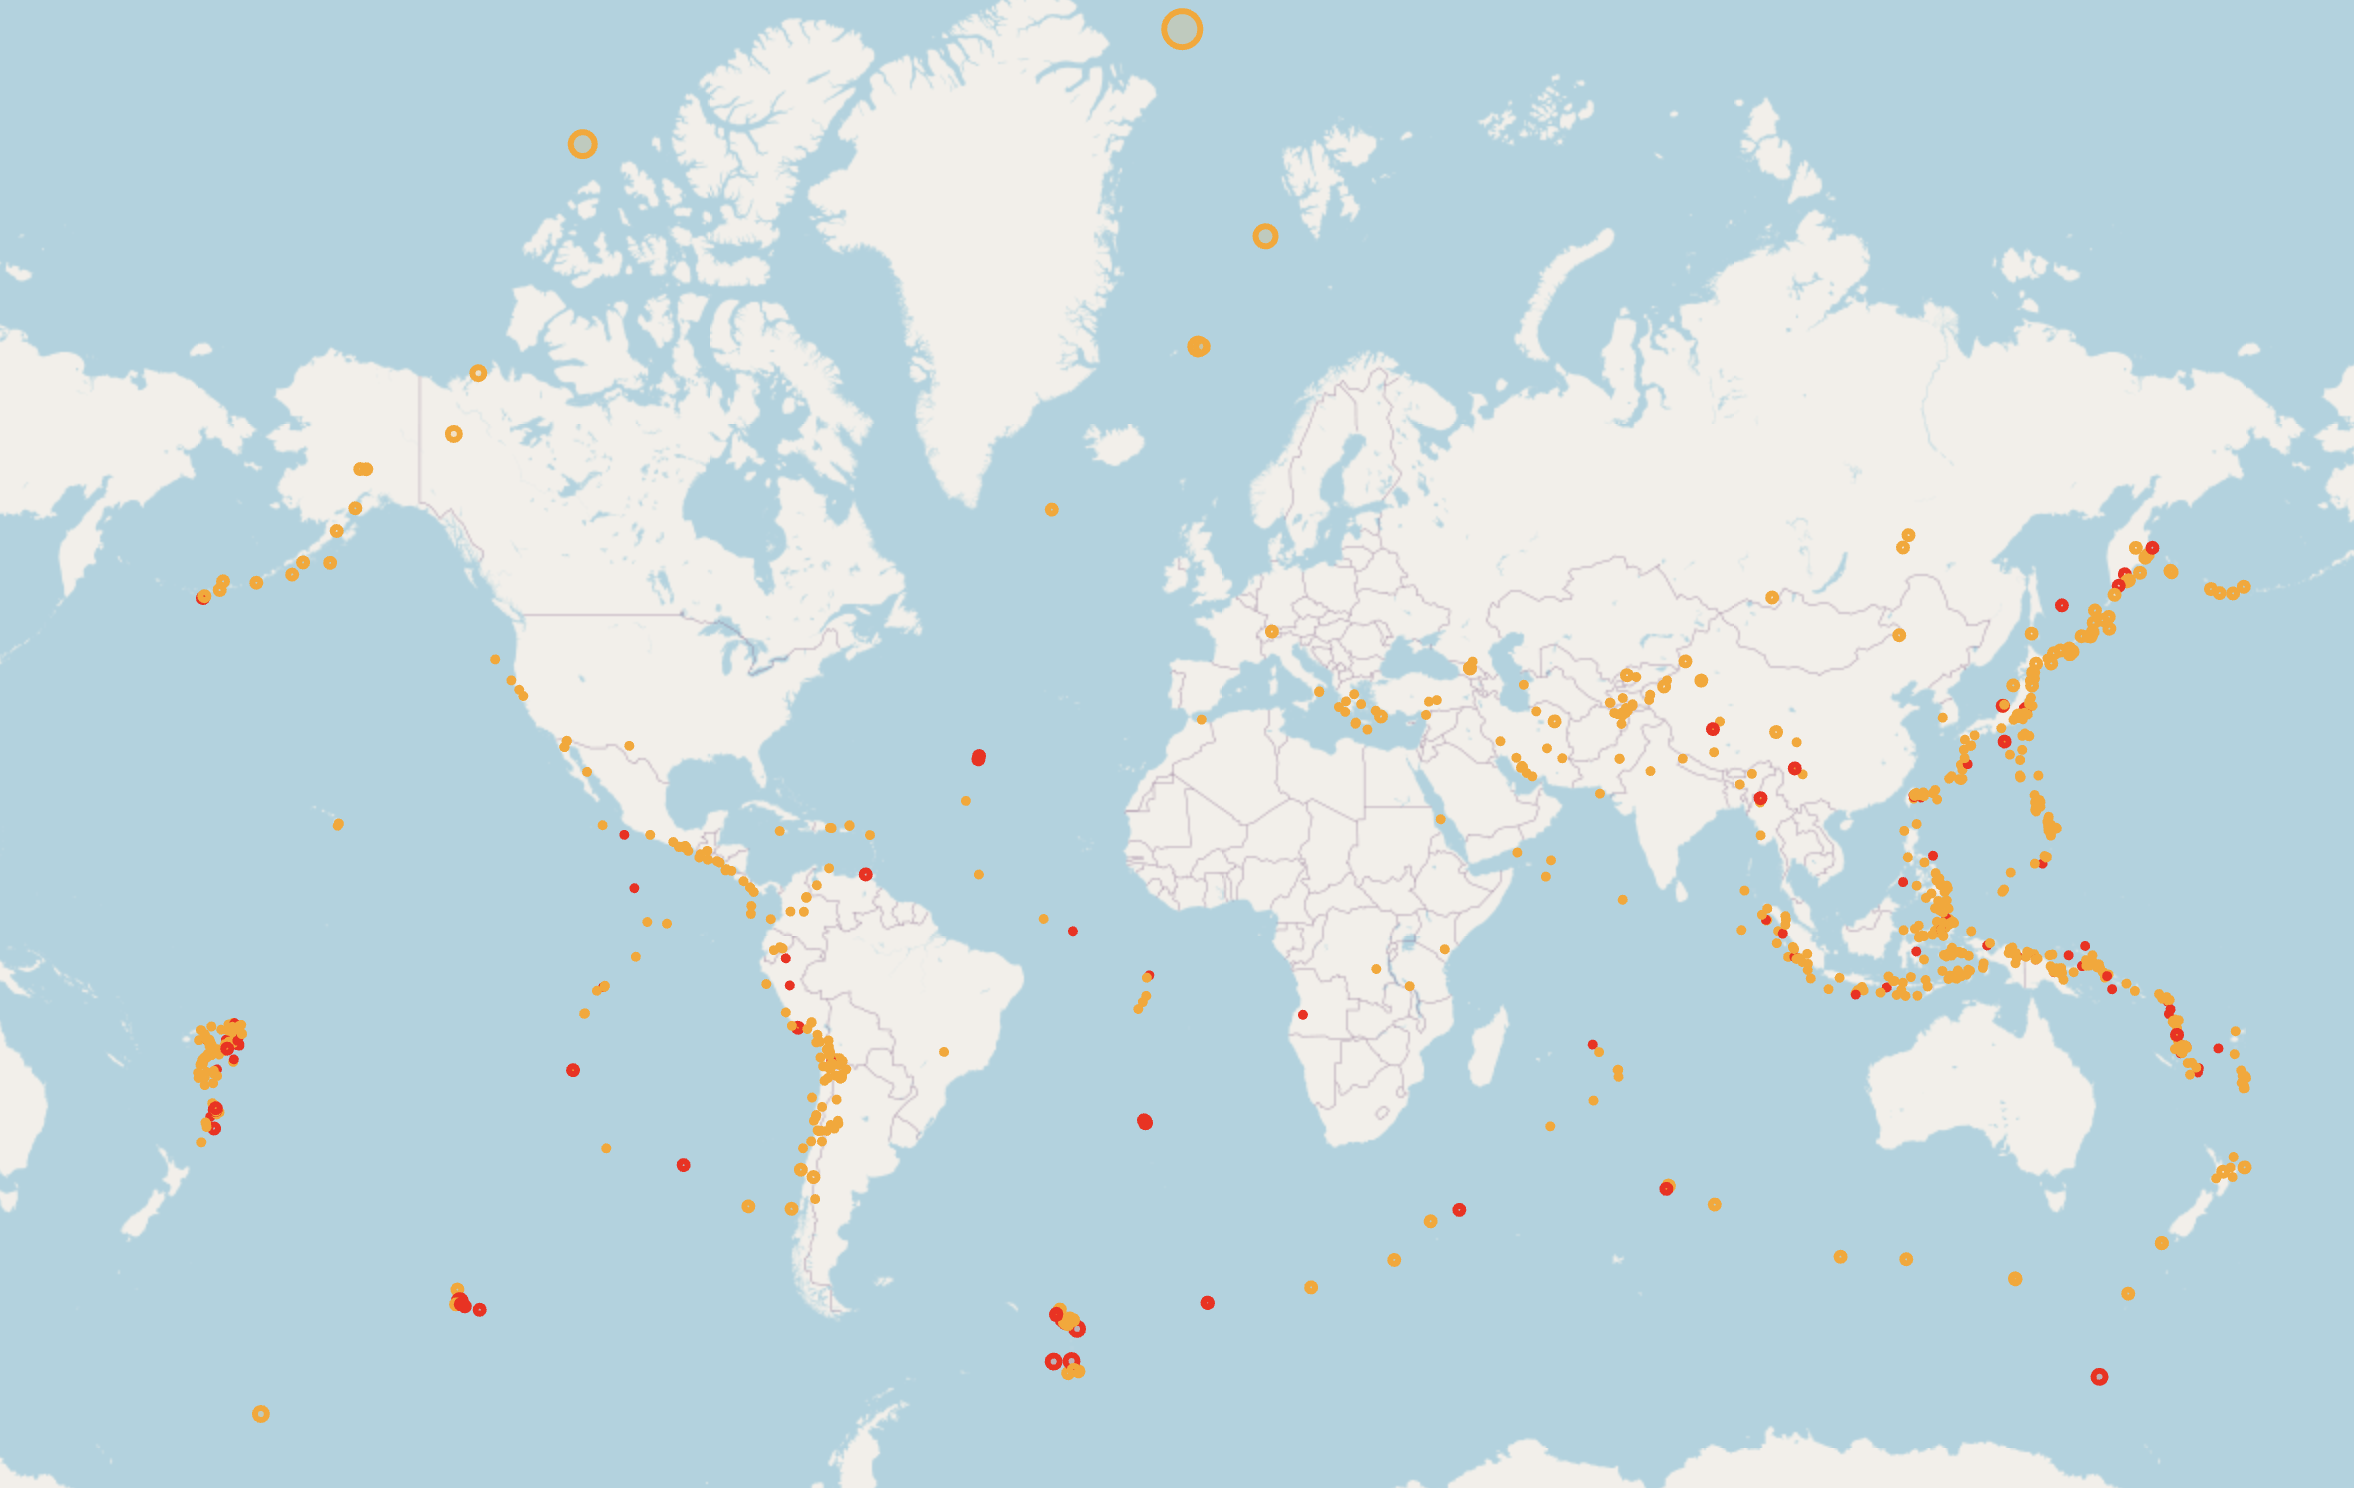

In [3]:
from IPython.display import Image

# Preview of map
Image(filename='Preview.png')
